# FFT of tagged pulses

## Tags from charge comparison method

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

GAMMA_FILE   = './data/output/gammasCurveCluster.csv'
NEUTRON_FILE = './data/output/neutronsCurveCluster.csv'

PULSE_INIT = 0
PULSE_LEN = 260
PULSE_LEN = PULSE_LEN - PULSE_INIT

In [257]:
dfGamma = pd.read_csv(GAMMA_FILE, index_col=0)
dfNeutron = pd.read_csv(NEUTRON_FILE, index_col=0)

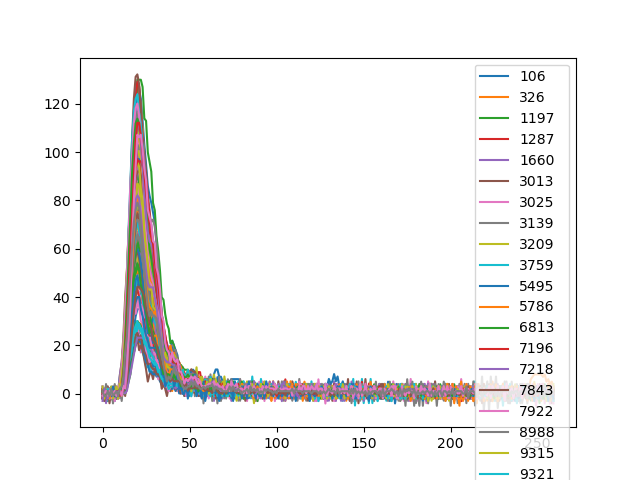

In [258]:
%matplotlib widget
dfNeutron[dfNeutron.columns[PULSE_INIT:PULSE_LEN + PULSE_INIT]].T.plot()
plt.show()

In [259]:
N_GAMMA_EVENTS = len(dfNeutron)*4
N_NEUTRON_EVENTS = len(dfNeutron)

In [260]:
fftNeutron = np.fft.fft(dfNeutron[dfNeutron.columns[PULSE_INIT:PULSE_LEN + PULSE_INIT]].iloc[:N_NEUTRON_EVENTS])
fftNeutron = np.abs(fftNeutron)
fftNeutron = pd.DataFrame(fftNeutron)
fftNeutron = fftNeutron[fftNeutron.columns[:PULSE_LEN//2]]


In [261]:
fftGamma = np.fft.fft(dfGamma[dfGamma.columns[PULSE_INIT:PULSE_LEN + PULSE_INIT]].iloc[:N_GAMMA_EVENTS])
# fftGamma = np.fft.fft(dfGamma[dfGamma.columns[:PULSE_LEN]].iloc[:])
fftGamma = np.abs(fftGamma)
fftGamma = pd.DataFrame(fftGamma)
fftGamma = fftGamma[fftGamma.columns[:PULSE_LEN//2]]

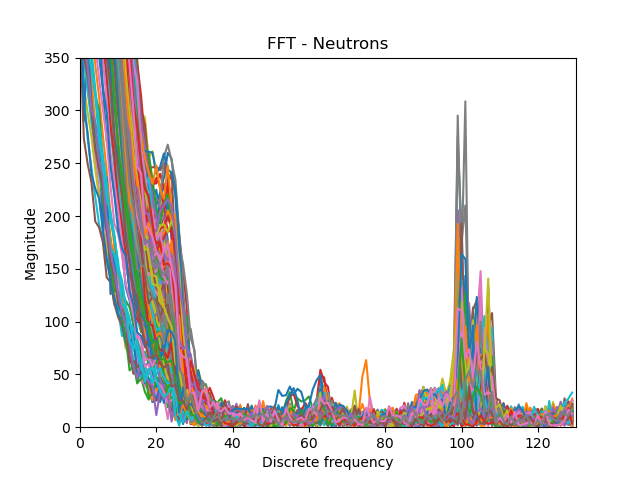

In [262]:
%matplotlib widget
plt.plot(fftNeutron.T)
plt.title("FFT - Neutrons")
plt.ylabel("Magnitude")
plt.xlabel("Discrete frequency")
plt.xlim([0,PULSE_LEN//2])
plt.ylim([0,350])
plt.show()

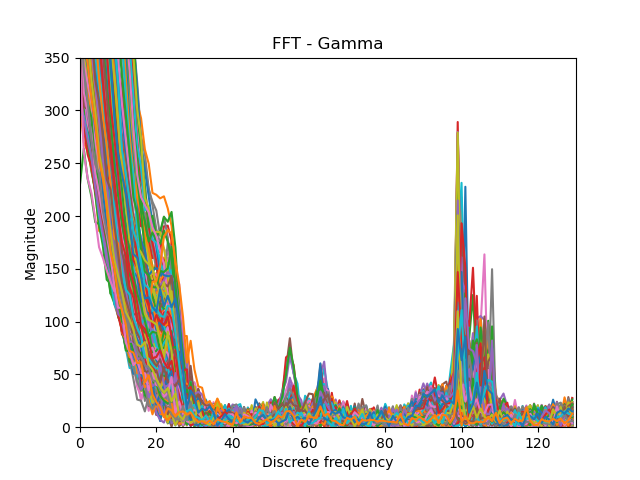

In [270]:
%matplotlib widget
plt.plot(fftGamma.T)
plt.title("FFT - Gamma")
plt.ylabel("Magnitude")
plt.xlabel("Discrete frequency")
plt.xlim([0,PULSE_LEN//2])
plt.ylim([0,350])
plt.show()

### Extracting PSD features from FFT

In [271]:
# LONG_START_FREQ = 0
# LONG_END_FREQ = PULSE_LEN//2

# SHORT_START_FREQ = 0
# SHORT_END_FREQ = PULSE_LEN//4


LONG_START_FREQ = 0
LONG_END_FREQ = PULSE_LEN//2

SHORT_START_FREQ = 85
SHORT_END_FREQ = 115

Neutrons

In [272]:
dfNeutronPSD = pd.DataFrame(columns=["psdShort", "psdLong", "psd"])
dfNeutronPSD["psdShort"] = fftNeutron[fftNeutron.columns[SHORT_START_FREQ:SHORT_END_FREQ]].sum(axis = 1)
dfNeutronPSD["psdLong"] = fftNeutron[fftNeutron.columns[LONG_START_FREQ:LONG_END_FREQ]].sum(axis = 1)
dfNeutronPSD["psd"] = dfNeutronPSD["psdShort"]/dfNeutronPSD["psdLong"]
dfNeutronPSD

psdShort       psdLong       psd
0    551.948253  17016.116249  0.032437
1    842.334881  10490.611065  0.080294
2    242.185197  13356.001025  0.018133
3    580.403474   8490.260099  0.068361
4    598.282330   8939.639287  0.066925
..          ...           ...       ...
163  178.035472  17577.714239  0.010128
164  356.497982  13309.693140  0.026785
165  252.418330   7498.194601  0.033664
166  961.510493  18095.894382  0.053134
167  534.290711  12579.720683  0.042472

[168 rows x 3 columns]

Gamma

In [273]:
dfGammaPSD = pd.DataFrame(columns=["psdShort", "psdLong", "psd"])
dfGammaPSD["psdShort"] = fftGamma[fftGamma.columns[SHORT_START_FREQ:SHORT_END_FREQ]].sum(axis = 1)
dfGammaPSD["psdLong"] = fftGamma[fftGamma.columns[LONG_START_FREQ:LONG_END_FREQ]].sum(axis = 1)
dfGammaPSD["psd"] = dfGammaPSD["psdShort"]/dfGammaPSD["psdLong"]
dfGammaPSD

psdShort       psdLong       psd
0    476.428678   7960.510118  0.059849
1    498.387141   6654.332134  0.074897
2    543.088926   4745.941843  0.114432
3    177.442537   8887.984750  0.019964
4    714.285248   8089.660645  0.088296
..          ...           ...       ...
667  531.345540   4610.527403  0.115246
668  418.751634   5083.189637  0.082380
669  637.988978  10772.857682  0.059222
670  824.096851   9049.303639  0.091067
671  237.779069   4349.798413  0.054664

[672 rows x 3 columns]

PSD Histogram

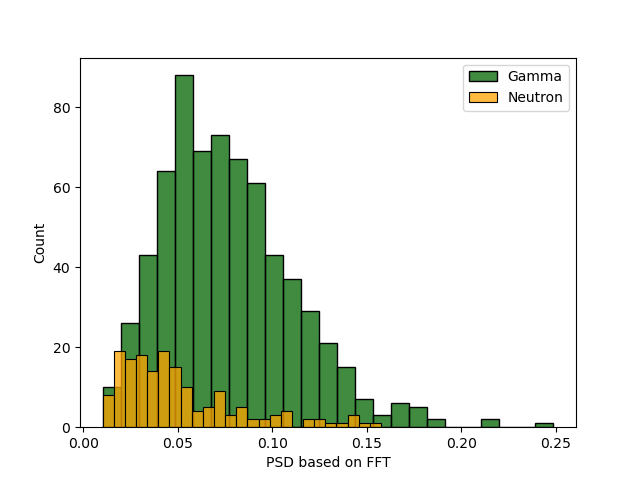

In [274]:
%matplotlib widget
sns.histplot(dfGammaPSD["psd"], color = "darkgreen", bins = 25)
sns.histplot(dfNeutronPSD["psd"], color = "orange", bins = 25)
plt.xlabel("PSD based on FFT")
plt.legend(["Gamma", "Neutron"])
plt.show()

PSD plotted against FFT energy

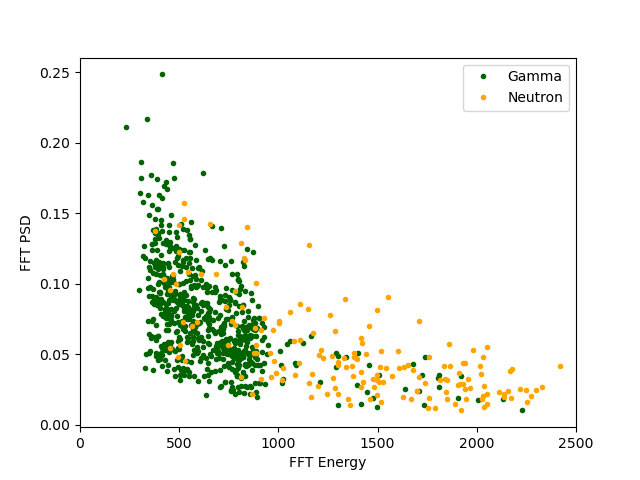

In [278]:
%matplotlib widget
plt.plot(dfGamma["Area"].iloc[:N_GAMMA_EVENTS], dfGammaPSD["psd"], '.', color = "darkgreen")
plt.plot(dfNeutron["Area"].iloc[:N_NEUTRON_EVENTS], dfNeutronPSD["psd"], '.', color = "orange")
plt.legend(["Gamma", "Neutron"])
plt.xlabel("FFT Energy")
plt.ylabel("FFT PSD")
plt.xlim([0,2500])
plt.show()

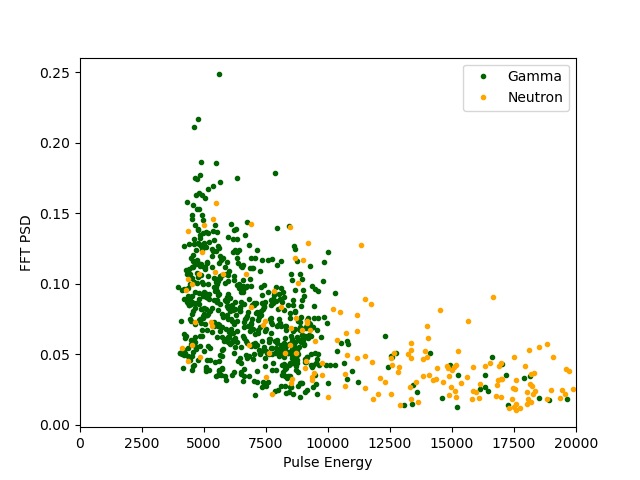

In [279]:

%matplotlib widget
plt.plot(dfGammaPSD["psdLong"], dfGammaPSD["psd"], '.', color = "darkgreen")
plt.plot(dfNeutronPSD["psdLong"], dfNeutronPSD["psd"], '.', color = "orange")
plt.legend(["Gamma", "Neutron"])
plt.xlabel("Pulse Energy")
plt.ylabel("FFT PSD")
plt.xlim([0,20000])
plt.show()

## Analyzing data with no prior tags

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

PULSES_FILE = './data/output/alignedPulses.csv'

PULSE_INIT = 0
PULSE_LEN = 260
PULSE_LEN = PULSE_LEN - PULSE_INIT

N_PULSES_EVENTS = 10000

In [293]:
dfPulses = pd.read_csv(PULSES_FILE, index_col = 0)
dfPulses

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     254     255     256     257     258     259      Area  \
0     -1.9333  ...  1.0667  0.0667  1.0667  0.0667  0.0667  0.0667  782.3333   
5      1.9833  ... -0.0167 -0.0167 -0.0167 -1.0167 -0.0167 -0.0167  628.6667   
10    -0.0500  ... -1.0500  0.9500 -0.0500  0.9500  0.9500 -0.0500  374.0000   
11     1.1667  ...  1.1667 -0.8333  0.1667  0.1667  1.1667  0.1667  892.3333   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  1.1167  754.3333   
...       ...  ...     ...     ...     ...     ...     ...     ...       ...   
51393  0.0000  ...  1.0000 -1.0000  1.0000 -1.0000  0.0000  0.0000  437.0000   
51394 -0.8667  ...  1.1333 -0.8667  0.1333  0.1333  0.1333  0.1333  471.6666   
51395  1.1000  ...  1.1000 -1.9000  2.1000 -0.9000  1.1000  1.1000  838.0000   
51396  1.1167  ... -0.8833  1.1167  0.1167  1.1167  0.1167  1.1167  409.3334   
51397  0.0333  ...  2.0333 -1.9667  2.0333 -1.9667  0.0333  1.0333  765.6667   

       leadingArea  trailingArea     FOM  
0         652.6667      129.6667  0.1657  
5         527.3333      101.3333  0.1612  
10        335.0000       39.0000  0.1043  
11        748.6667      143.6667  0.1610  
12        629.6667      124.6667  0.1653  
...            ...           ...     ...  
51393     376.0000       61.0000  0.1396  
51394     403.3334       68.3333  0.1449  
51395     703.0000      135.0000  0.1611  
51396     330.6666       78.6667  0.1922  
51397     663.3333      102.3333  0.1337  

[36832 rows x 264 columns]

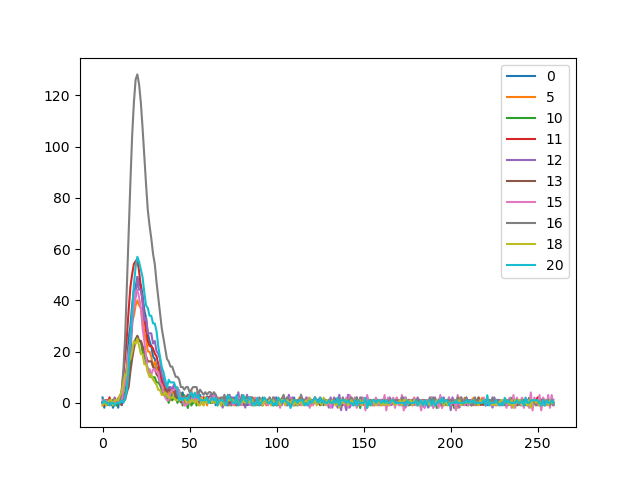

In [294]:
%matplotlib widget
dfPulses[dfPulses.columns[PULSE_INIT:PULSE_LEN + PULSE_INIT]].iloc[:10].T.plot()
plt.show()

In [295]:
fftPulses = np.fft.fft(dfPulses[dfPulses.columns[PULSE_INIT:PULSE_LEN + PULSE_INIT]].iloc[:N_PULSES_EVENTS])
fftPulses = np.abs(fftPulses)
fftPulses = pd.DataFrame(fftPulses)
fftPulses = fftPulses[fftPulses.columns[:PULSE_LEN//2]]

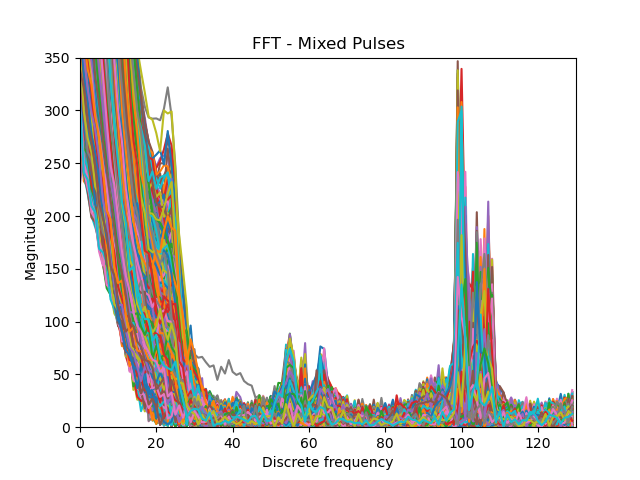

In [296]:
%matplotlib widget
plt.plot(fftPulses.T)
plt.title("FFT - Mixed Pulses")
plt.ylabel("Magnitude")
plt.xlabel("Discrete frequency")
plt.xlim([0,PULSE_LEN//2])
plt.ylim([0,350])
plt.show()

### Extracting PSD features from FFT

In [297]:
# LONG_START_FREQ = 0
# LONG_END_FREQ = PULSE_LEN//2

# SHORT_START_FREQ = 0
# SHORT_END_FREQ = PULSE_LEN//4


LONG_START_FREQ = 0
LONG_END_FREQ = PULSE_LEN//2

SHORT_START_FREQ = 0
SHORT_END_FREQ = 40

In [298]:
dfPulsesPSD = pd.DataFrame(columns=["psdShort", "psdLong", "psd"])
dfPulsesPSD["psdShort"] = fftPulses[fftPulses.columns[SHORT_START_FREQ:SHORT_END_FREQ]].sum(axis = 1)
dfPulsesPSD["psdLong"] = fftPulses[fftPulses.columns[LONG_START_FREQ:LONG_END_FREQ]].sum(axis = 1)
dfPulsesPSD["psd"] = dfPulsesPSD["psdShort"]/dfPulsesPSD["psdLong"]
dfPulsesPSD

psdShort       psdLong       psd
0      7004.612234   7960.510118  0.879920
1      5749.546833   6654.332134  0.864031
2      3745.834637   4745.941843  0.789271
3      8204.951718   8887.984750  0.923151
4      6936.886712   8089.660645  0.857500
...            ...           ...       ...
9995   4572.390419   5896.718416  0.775413
9996   5470.780371   6718.995242  0.814226
9997  14889.379784  15748.398991  0.945454
9998   7261.272775   8248.651577  0.880298
9999   7177.202069   8551.461427  0.839295

[10000 rows x 3 columns]

PSD Histogram

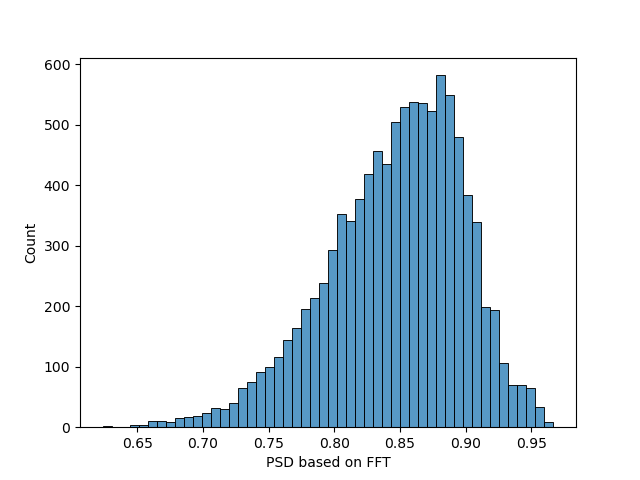

In [300]:
%matplotlib widget
sns.histplot(dfPulsesPSD["psd"], bins = 50)
plt.xlabel("PSD based on FFT")
plt.show()

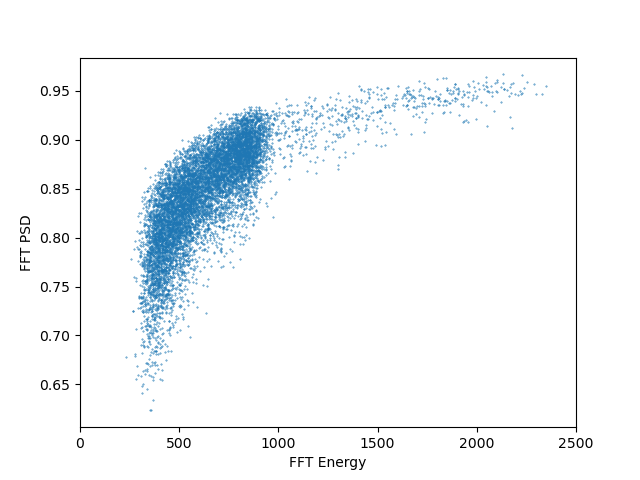

In [306]:
%matplotlib widget
plt.plot(dfPulses["Area"].iloc[:N_PULSES_EVENTS], dfPulsesPSD["psd"], '.', markersize = 0.75)
plt.xlabel("FFT Energy")
plt.ylabel("FFT PSD")
plt.xlim([0,2500])
plt.show()